## A simple example of convolutional neural networks

In this lab, we are going to use the MNIST dataset.

MNIST is a dataset of 28x28 pixel grayscale images that depict handwritten digits. There are 10 different digits represented in the dataset: 0, 1, 2, 3, 4, 5, 6, 7, 8 and 9. 


![mnist](http://i.ytimg.com/vi/0QI3xgXuB-Q/hqdefault.jpg)

In [1]:
!pip install tensorflow
!pip install keras
!pip install seaborn
!pip install pillow h5py scikit-learn

     |████████████████████████████████| 394.8 MB 10 kB/s 
     |████████████████████████████████| 57 kB 429 kB/s 
     |████████████████████████████████| 42 kB 109 kB/s 
     |████████████████████████████████| 462 kB 8.3 kB/s 
     |████████████████████████████████| 3.8 MB 7.8 kB/s 
     |████████████████████████████████| 10.6 MB 23 kB/s 
     |████████████████████████████████| 65 kB 801 kB/s 
     |████████████████████████████████| 127 kB 8.2 MB/s 
     |████████████████████████████████| 1.0 MB 8.4 MB/s 
     |████████████████████████████████| 96 kB 771 kB/s 
     |████████████████████████████████| 779 kB 7.6 MB/s 
     |████████████████████████████████| 114 kB 7.9 MB/s 
     |████████████████████████████████| 47 kB 459 kB/s 
     |████████████████████████████████| 155 kB 11 kB/s 
     |████████████████████████████████| 147 kB 6.9 MB/s 
     |████████████████████████████████| 77 kB 235 kB/s 
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4830 sha256=3864

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 10
input_shape = (28, 28, 1)

# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(type(x_train))
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


11493376/11490434 [==============================] - 2s 0us/step
<class 'numpy.ndarray'>
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [61]:
print(x_train.shape)

(60000, 28, 28, 1)


In [71]:
x_val = x_train[:6000]
y_val = y_train[:6000]

In [3]:
# import keras
# from keras import layers
# from keras import models
# from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation
# from keras.models import Model, Sequential

# model = Sequential()

# model.add(Conv2D(6, (5,5), input_shape=(28, 28, 1)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(10, activation="softmax"))


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()

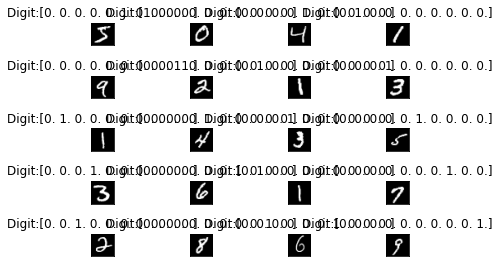

In [35]:
plot_digits(x_train, y_train)

![](https://raw.githubusercontent.com/MostafaGazar/mobile-ml/master/files/lenet.png)

Link paper: http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf

In [88]:
# To build model using LeNet-5 CNN architecture

# 0.9865
model1 = keras.Sequential([
    layers.Conv2D(6, kernel_size=5, strides=1, activation='tanh', input_shape=input_shape, padding='same'), # C1
    layers.AveragePooling2D(), # S2
    layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), # C3
    layers.AveragePooling2D(), # S4
    layers.Flatten(), # Flatten
    layers.Dense(120, activation='tanh'), # C5
    layers.Dense(84, activation='tanh'), # F6
    layers.Dense(10, activation='softmax') # Output layer
])

# 0.9929
model2 = keras.Sequential([
    layers.Conv2D(32, kernel_size=5, strides=1, activation='relu', input_shape=input_shape, padding='same'), # C1
    # layers.AveragePooling2D(), # S2
    layers.MaxPool2D(strides=2),
    layers.Conv2D(48, kernel_size=3, strides=1, activation='relu', padding='valid'), # C3
    # layers.AveragePooling2D(), # S4
    layers.MaxPool2D(strides=2),
    layers.Flatten(), # Flatten
    layers.Dense(256, activation='relu'), # C5
    layers.Dense(84, activation='relu'), # F6
    layers.Dense(10, activation='softmax') # Output layer
])

In [81]:
BATCH_SIZE = 128
EPOCHS = 10
model1.summary()
model1.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
model1.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2)
# validation_data=(x_val, y_val)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_18 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_19 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_38 (Dense)             (None, 84)              

In [82]:
model1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0512 - accuracy: 0.9833


[0.05115344375371933, 0.983299970626831]

In [95]:
BATCH_SIZE = 128
EPOCHS = 21
model2.summary()
adam_lr = keras.optimizers.Adam(lr=5e-4)
model2.compile(optimizer=adam_lr, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model2.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 12, 12, 48)        13872     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 48)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 1728)              0         
_________________________________________________________________
dense_46 (Dense)             (None, 256)               442624    
_________________________________________________________________
dense_47 (Dense)             (None, 84)              

In [96]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0441 - accuracy: 0.9929


[0.044101860374212265, 0.992900013923645]

In [4]:
import tensorflow as tf

opt = tf.keras.optimizers.Adam(learning_rate=1e-3) 

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics='accuracy')

history = model.fit(x_train, y_train,
          epochs=10,
          batch_size=16)

Epoch 1/10
3750/3750 [==============================] - 13s 3ms/step - loss: 0.4643 - accuracy: 0.8572
Epoch 2/10
3750/3750 [==============================] - 13s 3ms/step - loss: 0.1172 - accuracy: 0.9650
Epoch 3/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0746 - accuracy: 0.9782
Epoch 4/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0599 - accuracy: 0.9826
Epoch 5/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0544 - accuracy: 0.9838
Epoch 6/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0481 - accuracy: 0.9851
Epoch 7/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0413 - accuracy: 0.9882
Epoch 8/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0370 - accuracy: 0.9886
Epoch 9/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.0332 - accuracy: 0.9897
Epoch 10/10
3750/3750 [==============================] - 11s 3ms/step - l

In [5]:
model.evaluate(x_test, y_test) 

313/313 [==============================] - 1s 2ms/step - loss: 0.0516 - accuracy: 0.9844


[0.051558274775743484, 0.9843999743461609]

## Assignment:



- [x] First, try to understand everything that is mentioned above.
- [x] Second, please take some time to change the network architecture to implement the LeNet architecture. Observe the change in performance.
- [x] Third, take some time to try different hyperparameters (learning rate, depth of the network, for example) and try to come up with the combination that obtains the highest accuracy on the test set.

